## **THAY ĐỔI CÁC THAM SỐ VÀ QUAN SÁT KẾT QUẢ**

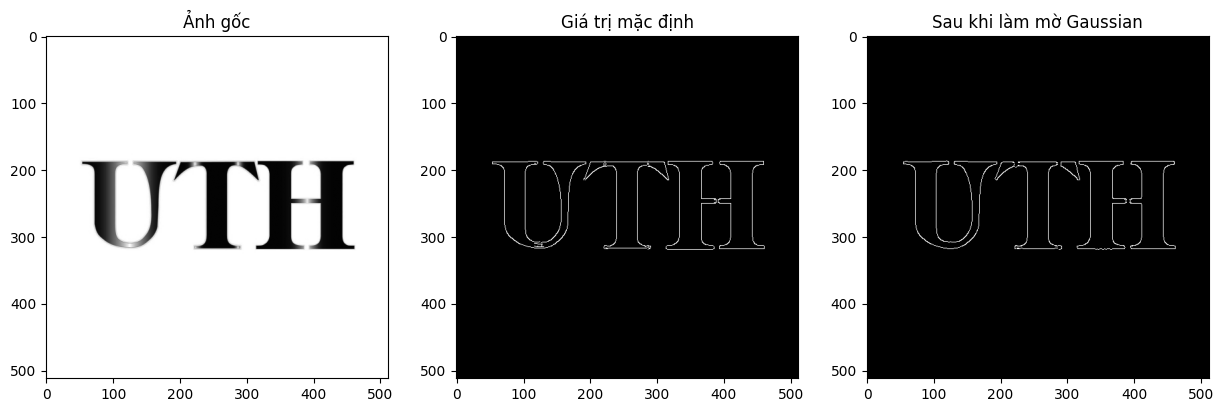

In [36]:
#Hàm Canny() với L2Gradient và Aperture_size
import cv2 
from matplotlib import pyplot as plt

# Sửa đường dẫn tương đối từ vị trí notebook
img = cv2.imread('../../../assets/images/anh_mau.jpg', cv2.IMREAD_GRAYSCALE)
plt.rcParams['figure.figsize'] = [15, 10]

# ngưỡng phổ biến hay sử dụng nhất và giúp ảnh rõ nét.
t_lower = 50
t_upper = 150
sigma = 1.4
# thêm sigma
blur = cv2.GaussianBlur(img, (5, 5), sigma)

# Giải thích: img là ảnh đầu vào, t_lower và t_upper là hai ngưỡng để phát hiện cạnh
edges_default = cv2.Canny(img, t_lower, t_upper)
edges_blur = cv2.Canny(blur, t_lower, t_upper)

# Hiển thị ảnh gốc và ảnh sau khi phát hiện cạnh
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(132), plt.imshow(edges_default, cmap='gray')
plt.title('Giá trị mặc định')
plt.subplot(133), plt.imshow(edges_blur, cmap='gray')
plt.title('Sau khi làm mờ Gaussian')
plt.show()

### **Giải thích và kết luận:**
`blur = cv2.GaussianBlur(img, (5, 5), sigma)` vào trong hình ta sẽ thấy được giá 5x5 có thể hiểu được là ma trận kernel dùng để làm mờ ảnh trên một khung hình 5x5 và `sigma` được gán giá trị mong muốn ví dụ các số phổ biến như là:
- **`0.4`**: số này nhỏ thì hình ảnh sẽ chi tiết hơn nhưng nhiễu thì bị hiều
- **`1.4`**: số này được sử dụng phổ biến nhất vì biên ổn và rõ
- **`>= 2`**: ở mức này thì biên sẽ rất mượt nhưng mất hết các chi tiết nhỏ

còn về:
```python
t_lower = 100
t_upper = 200
```
thì nó là ngưỡng thấp và cao, ngưỡng thấp thì nó sẽ giữ các biên yếu lại càng cao thì biên yếu càng mất, còn về biên cao là giữ các biên mạnh và càng cao thì biên thật càng nhiều (rõ nét)

→ vậy khi so sánh với giá trị mặc định là `edges_default = cv2.Canny(img, t_lower, t_upper)` thì mình có rút được một số kết luận là việc sử dụng sigma vào images thì có ảnh hưởng trực tiếp đến hình đặt biệt là các biên nhỏ nếu tăng độ blur lên là `2`. còn khi về với giá trị là `edges_blur = cv2.Canny(1.4, 50, 150)` thì hình ảnh khi có blur sẽ làm ảnh được đều viền chữ hơn và nhìn rất miện. 

**→ Vậy thì tùy vào các hình ảnh mình sẽ tùy chỉnh sao cho phù hợp nhất.**